# Lab 3 : Interpolazione, approssimazione e SVD  


 ## 1) Interpolazione nella forma di Lagrange 


---


 
 Usare la funzione  fornita, che calcola il polinomio di interpolazione nella forma di Lagrange  in un punto, per interpolare la funzione di  Runge:
$$f(x)=\frac{1}{1+x^2}, \ \ x \in [-5,5]$$

* nei punti $x_i, \ i=0, \ldots n$ equamente spaziati in [-5,5].
* nei nodi di Chebyshev   
	$$x_i=\frac{x_0+x_n}{2}+ \frac{x_n-x_0}{2}cos(\frac{(2*i+1)\pi}{2*(n+1)}), \ \ i=0, \ldots n$$

Disegnare il grafico della funzione di Runge insieme a quello del polinomio di interpolazione per qualche valore di n (ad esempio n=5, 6, 11, 25).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def my_lagrange(x,y,alfa):

# x,y coordinate punti da interpolare
# alfa: punto (anche vettoriale) in cui si valuta il polinomio di Lagrange

 N=x.size; # dimensione del dataset
 p=0
 for j in range(0,N): 
   q=1;
   for i in range(0,N):
     if i!=j:
       q=q*(alfa-x[i])/(x[j]-x[i]);
   p=p+q*y[j];
 return p

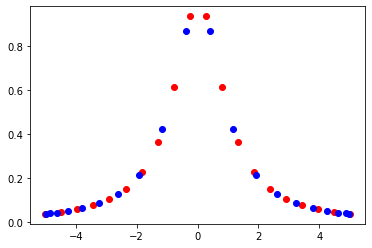

In [39]:
import math
n = 20

# Funzione da interpolare
def f(x):
  return 1/(1+x**2)

# Metodo alternativo per definire una funzione
f_1= lambda x: 1/(1+x**2)

# CALCOLO DEI NODI 

x0 = -5
xn = 5

# Creazione dei nodi equispaziati
x = np.linspace(-5,5,n)
# Calcolo f(x) per definire i nodi di interpolazione
y = f(x)

# Creazione dei nodi di Chebyshev 
x_c = np.zeros(n)
for i in range(0,n):
  x_c[i] = (x0+xn)/2+((xn-x0)/2)*np.cos(((2*i+1)*np.pi)/(2*(n)))
# Calcolo f(x_c) per definire i nodi di interpolazione
y_c=f_1(x_c)

#GRAFICO DEI NODI

plt.plot(x, y, 'ro')
plt.plot(x_c, y_c, 'bo')

plt.show()

In [40]:
# Calcolo dei valori dei polinomi con la forma di Lagrange

# punti su cui valutare i polinomi 
N = 100
x_plot=np.linspace(-5,5,N, dtype=float)

# Valutazione dei polinomi interpolanti
p = my_lagrange(x, y, x_plot) # sui nodi equidistanti
p_c =  my_lagrange(x_c, y_c, x_plot)




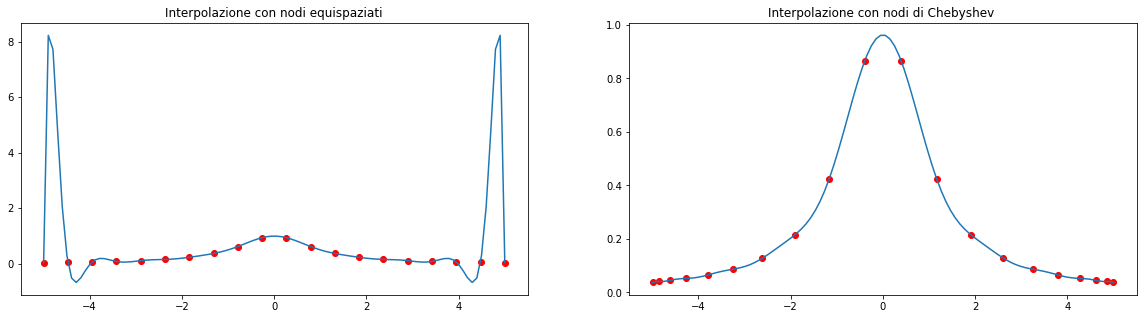

In [41]:
# Confronto grafico

plt.figure(figsize=(20, 5))

fig1 = plt.subplot(1, 2, 1)
fig1.plot(x, y,'ro')
fig1.plot(x_plot,p)
plt.title('Interpolazione con nodi equispaziati')

fig2 = plt.subplot(1, 2, 2)
fig2.plot(x_c,y_c,'ro')
fig2.plot(x_plot,p_c)
plt.title('Interpolazione con nodi di Chebyshev ')

plt.show()

## 2) Approssimazione di un set di dati tramite Minimi Quadrati


---

Sia $\{(x_i, y_i)\}_{i=1}^N$ un set di dati, che devono essere approssimati da un polinomio
\begin{align*}
  p(x) = \alpha_0 + \alpha_1 x + \dots + \alpha_n x^n 
\end{align*}
di grado $n \in \mathbb{N}$ fissato. \\

Si definisce una matrice

\begin{align*}
  A = 
  \begin{bmatrix}
    1 & x_1 & x_1^2 & \dots & x_1^n \\
    1 & x_2 & x_2^2 & \dots & x_2^n \\
    \vdots & \vdots & \vdots & \vdots & \vdots \\
    1 & x_N & x_N^2 & \dots & x_N^n
  \end{bmatrix}
\end{align*}

E i vettori

\begin{align*}
  \alpha = 
  \begin{bmatrix}
    \alpha_0 \\ \vdots \\ \alpha_n
  \end{bmatrix} \qquad
  y = 
  \begin{bmatrix} 
    y_0 \\ \vdots \\ y_N
  \end{bmatrix}
\end{align*} \\

Reimpostando il problema con la formulazione ai minimi quadrati e risolvendo quindi il problema

\begin{align*}
  \min_\alpha ||A \alpha - y||_2^2
\end{align*}

si ottengono i coefficenti $\alpha$ che definiscono in modo univoco il polinomio interpolante $p(x)$. \\


* Calcolare il polinomio di grado $n = 5$ che approssimi i seguenti dati:$\{ (1.0, 1.18), (1.2, 1.26), (1.4, 1.23), (1.6, 1.37), (1.8, 1.37), (2.0, 1.45), (2.2, 1.42), (2.4, 1.46), (2.6, 1.53), (2.8, 1.59), (3.0, 1.50) \}$ 
* Risolvere il problema ai minimi quadrati sia con le equazioni normali che con la SVD.
* Valutare graficamente i polinomi di approssimazione e confrontare gli errori commessi dai due metodi sul set di punti.

In [ ]:
import numpy as np

In [56]:
# CREAZIONE DEL PROBLEMA 

n = 5 # Grado del polinomio approssimante

x = np.array([1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.5])

N = len(x)

A = np.zeros((N,n))
for i in range(n):
    A[:, i] = x**i
print("A = \n", A)

A = 
 [[ 1.      1.      1.      1.      1.    ]
 [ 1.      1.2     1.44    1.728   2.0736]
 [ 1.      1.4     1.96    2.744   3.8416]
 [ 1.      1.6     2.56    4.096   6.5536]
 [ 1.      1.8     3.24    5.832  10.4976]
 [ 1.      2.      4.      8.     16.    ]
 [ 1.      2.2     4.84   10.648  23.4256]
 [ 1.      2.4     5.76   13.824  33.1776]
 [ 1.      2.6     6.76   17.576  45.6976]
 [ 1.      2.8     7.84   21.952  61.4656]
 [ 1.      3.      9.     27.     81.    ]]


# Risoluzione tramite equazioni normali

---

Il problema ai minimi quadrati

\begin{align*}
  \min_\alpha ||A\alpha - y||_2^2
\end{align*}

può essere risolto col metodo delle equazioni normali, ossia osservando che il problema di minimo può essere riscritto come:

\begin{align*}
  A^T A \alpha = A^T y
\end{align*}

Risolvendo questo sistema lineare (ad esempio con fattorizzazione di Cholesky o con metodi iterativi) si ottiene il vettore degli $\alpha$ che corrisponde ai coefficenti del polinomio approssimante.


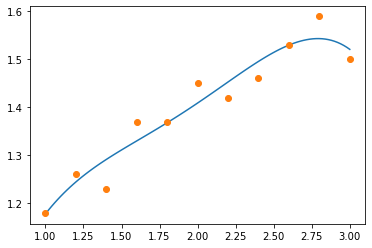

In [62]:
import scipy.linalg

# Crea matrice del sistema 
ATA = np.dot(A.T, A)
# Crea termine noto del sistema
ATy = np.dot(A.T, y)

# Risolvi il sistema lineare 
L = scipy.linalg.cholesky(ATA, lower=True)

beta = scipy.linalg.solve_triangular(L, ATy, lower=True)
alpha = scipy.linalg.solve_triangular(L.T, beta)

def p(alpha, x):
    n = len(alpha)
    y = 0
    for i in range(n):
        y = y + alpha[i] * x**i

    return y

x_plot = np.linspace(1, 3, 100)
y_plot = p(alpha, x_plot)

plt.plot(x_plot, y_plot)
plt.plot(x, y, 'o')
plt.show()

# Risoluzione tramite SVD

---

Consideriamo la decomposizione SVD della matrice $A$

\begin{align*}
  A = U S V^T
\end{align*}

Con $U \in \mathbb{R}^{N \times N}$ e $V^T \in \mathbb{R}^{n \times n}$ matrici unitarie e $S \in \mathbb{R}^{N \times n}$ diagonale. \\

Le equazioni normali diventano:

\begin{align*}
  &A^T A \alpha = A^T y \iff V S U^T U S V^T \alpha = V S U^T y \iff \\
  & V S^2 V^T \alpha = V S U^T y \iff S V^T \alpha = U^T y \iff \\
  & \alpha = S^{-1} V U^T y
\end{align*}

E quindi

\begin{align*}
  \alpha_i = \sum_{j=1}^N \frac{(u_i^T y)v_i}{s_i}
\end{align*}

In [ ]:
help(scipy.linalg.svd)

In [ ]:
U, s, Vh = scipy.linalg.svd(A)

# Verifica la fattorizzazione
...

# Calcolo la soluzione del sistema  
alpha_svd = np.zeros(s.shape)
for i in range(n+1):
  ...
  alpha_svd = alpha_svd + ...



# Verifica e confronto delle soluzioni

In [ ]:
# Funzione per valutare il polinomio p, in un punto x, dati i coefficienti alpha
def p(alpha, x):
  ...
  return y


# CONFRONTO ERRORI SUI DATI ----------------------------------
y1 = p(...)
y2 = p(...)

err1 = np.linalg.norm (y-y1, 2) 
err2 = np.linalg.norm (y-y2, 2) 
print ('Errore di approssimazione con Eq. Normali: ', err1)
print ('Errore di approssimazione con SVD: ', err2)



# CONFRONTO GRAFICO ----------------------------------

import matplotlib.pyplot as plt

# vettore per il plot
x_plot = ...
# Polinomi valutati in x_plot
y_normali = ...
y_svd = ...


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
...
plt.title('Approssimazione tramite Eq. Normali')

plt.subplot(1, 2, 2)
...
plt.title('Approssimazione tramite SVD')

plt.show()






# Importazione dataset da Kaggle

---

Come secondo esercizio andremo ad eseguire approssimazione polinomiale su un dataset caricato dall'esterno. Nello specifico, utilizzeremo un data set di Kaggle (www.kaggle.com) contenente dati riguardanti il peso e l'altezza di alcuni individui (nello specifico, 71 individui).
Il data set è scaricabile al seguente indirizzo: https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression . \\

Una volta scaricato, è necessario uploadarlo su Colab. Per leggere il file utilizzeremo una libreria chiamata $\texttt{pandas}$ molto utilizzata quando si lavora coi dati. La funzione per caricarlo è $\texttt{pandas.read_csv}$ che darà come output il dataset, che dovrà successivamente essere convertito in numpy array.

In [ ]:
import pandas as pd
data = pd.read_csv("HeightVsWeight.csv")
data = np.array(data)

print(data.shape)

In [ ]:
x = data[:, 0]
y = data[:, 1]

print(x.shape)
print(y.shape)

n = ...
N = ...

A = ...

In [ ]:
# RISOLUZIONE CON EQUAZIONI NORMALI
...

alpha_normali = ...

In [ ]:
# RISOLUZIONE CON SVD

U, s, Vh = ...

alpha_svd = ...
for i ...
  ...
  alpha_svd = alpha_svd + ...

In [ ]:
# VISUALIZZAZIONE DEI RISULTATI

x_plot = ...
y_normali = p(...)
y_svd = p(...)

plt.figure(figsize=(20, 10))
...
plt.show()

## 3) Compressione di una immagine tramite SVD

---
Caricare e visualizzare un'immagine A in scala di grigio, di dimensione $m \times n$. Poi:
* Calcolare la matrice $A_p=\sum_{i=1}^p u_i * v_i^T * \sigma_i$, dove  $p<= rango(A)$
*   Visualizzare le immagini $A_p$ ottenute al variare di p, considerando i valori singolari in ordine prima crescente poi decrescente.
*   Calcolare l' errore relativo: $$\frac{\|A-A_p\|_2}{\|A\|_2}$$ e plottarlo al variare di p. 
*  Calcolare il fattore di compressione  $$c_p = \frac{1}{p}\min(m,n) -1$$  e plottarlo al variare di p.


In [ ]:
# Importo l'immagine 

from skimage import data
A = data.coins()

# SVD dell'immagine A
U, s, Vh = ...

# Calcolo di A_p
A_p = np.zeros(A.shape)
p = 30
for i in range(p):
  ...
  A_p = A_p + ...

# Calcolo dell'errore relativo
err_rel = ...
print('...')
# Calcolo del fattore di compressione
c = ...
print('...')

# Guardo l'immagine originale A e quella compressa A_p, in scala di grigi
plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('True image')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Reconstructed image with p =' + str(p))

plt.show()